## Exp-4: Classification Using Logistic Regression, Decision Tree, and k-Nearest Neighbors

# Name : Tanvi Santosh Patil       Roll No : 53

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

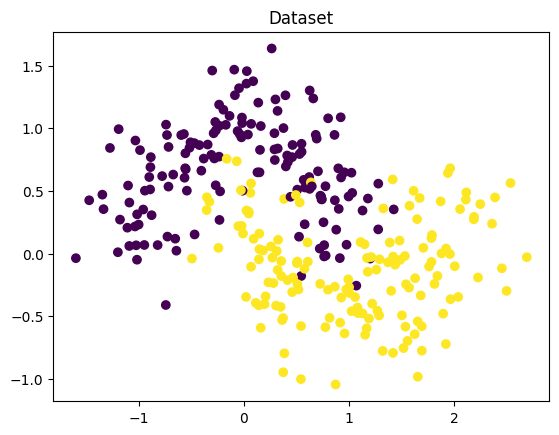

In [9]:
x , y = make_moons(n_samples = 300 , noise = 0.25 , random_state=42)

plt.scatter(x[:,0],x[:,1],c=y)
plt.title("Dataset")
plt.show()

In [10]:
x_train, x_test, y_train, y_test = train_test_split(
    x,y, test_size = 0.3 , random_state = 0
)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform (x_train)
x_test_scaled = scaler.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression

lr=LogisticRegression()
lr.fit(x_train_scaled , y_train)

y_pred_lr = lr.predict(x_test_scaled)
print("logistic Regression")
print("Accuracy :" , accuracy_score (y_test , y_pred_lr))
print("Confusion Matrics : \n" , confusion_matrix(y_test , y_pred_lr))

logistic Regression
Accuracy : 0.8777777777777778
Confusion Matrics : 
 [[34  5]
 [ 6 45]]


In [12]:
dt = DecisionTreeClassifier( max_depth = 4 )
dt.fit(x_train , y_train)
y_pred_dt = dt.predict(x_test)

print("Decision tree")
print("Accuracy :" , accuracy_score (y_test , y_pred_dt))
print("Confusion Matrics : \n" , confusion_matrix(y_test , y_pred_dt))

Decision tree
Accuracy : 0.8555555555555555
Confusion Matrics : 
 [[30  9]
 [ 4 47]]


In [13]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(x_train_scaled , y_train)

y_pred_knn = knn.predict(x_test_scaled)
print("KNN")

print("Accuracy :", accuracy_score (y_test , y_pred_knn))
print("Confusion Matrics : \n" , confusion_matrix(y_test , y_pred_knn))

KNN
Accuracy : 0.9111111111111111
Confusion Matrics : 
 [[38  1]
 [ 7 44]]


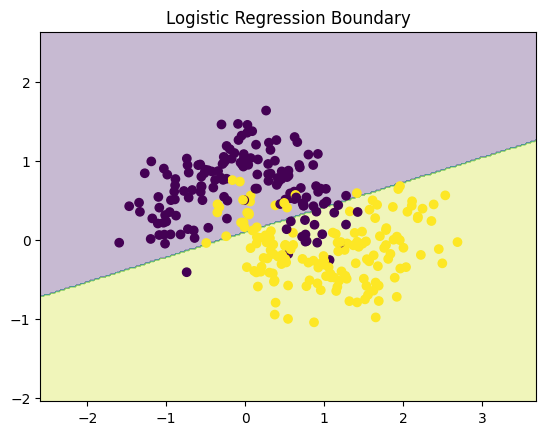

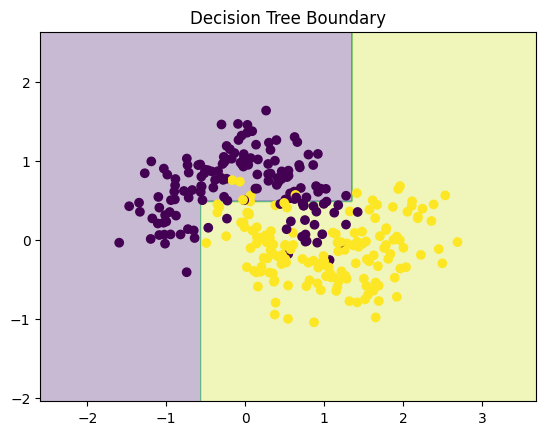

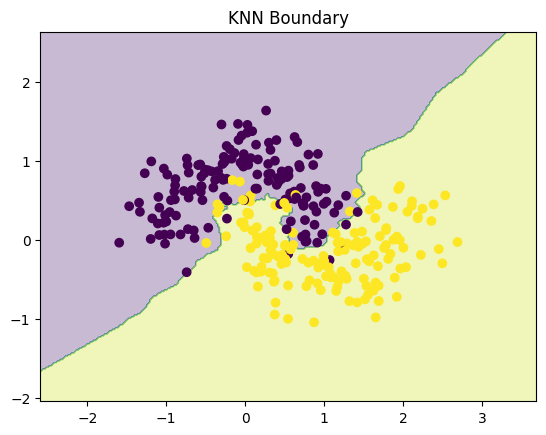

In [14]:
def plot_boundary(model,scaled,title):

  h=0.02

  x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() +1
  y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() +1

  xx,yy = np.meshgrid(np.arange(x_min,x_max,h),
                      np.arange(y_min,y_max,h))

  grid = np.c_[xx.ravel(),yy.ravel()]

  if scaled:
    grid = scaler.transform(grid)

  Z = model.predict(grid)
  Z=Z.reshape(xx.shape)

  plt.contourf(xx,yy,Z,alpha=0.3)
  plt.scatter(x[:,0],x[:,1],c=y)
  plt.title(title)
  plt.show()

plot_boundary(lr,True,"Logistic Regression Boundary")
plot_boundary(dt,False,"Decision Tree Boundary")
plot_boundary(knn,True,"KNN Boundary")

## Recitation 4

In [15]:
# Data
X = np.array([[48,1.8],[50,2.0],[52,2.1],[60,2.8],[62,3.0],[65,3.2]])
y = np.array([0,0,0,1,1,1])
xtest = np.array([[58,2.6]])

# Logistic Regression
lr = LogisticRegression()
lr.fit(X, y)
print("Logistic Regression:" , lr.predict(xtest))

# Decision Tree (Entropy)
dt_entropy = DecisionTreeClassifier(criterion="entropy")
dt_entropy.fit(X, y)
print("Decision Tree (Entropy):" , dt_entropy.predict(xtest))

# Decision Tree (Gini)
dt_gini = DecisionTreeClassifier(criterion="gini")
dt_gini.fit(X, y)
print("Decision Tree (Gini):" , dt_gini.predict(xtest))

# kNN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X, y)
print("kNN:" , knn.predict(xtest))

Logistic Regression: [1]
Decision Tree (Entropy): [1]
Decision Tree (Gini): [1]
kNN: [1]
